## IMPORTING LIBRARYS

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import fetch_california_housing 
from mpl_toolkits.basemap import Basemap
import plotly.express as px

## GETTING DATA

In [3]:
pure_data= fetch_california_housing()  
df=pd.DataFrame(data=pure_data.data,columns=pure_data.feature_names) 
df['MedHouseVal']=pure_data.target 
df=df.sample(frac=1) 
df 
X=df.drop(columns=['MedHouseVal'],axis=1)
y=df['MedHouseVal'] 
df 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
12944,4.8375,40.0,6.862500,1.093750,415.0,2.593750,38.64,-121.26,2.17400
17051,5.1071,41.0,6.918129,1.187135,455.0,2.660819,37.47,-122.24,3.14100
1212,2.9063,27.0,6.025126,1.125628,463.0,2.326633,38.07,-120.55,0.92200
8858,3.8088,27.0,4.345395,1.125000,2665.0,1.753289,34.08,-118.39,5.00001
1758,2.8833,45.0,4.715385,1.073077,590.0,2.269231,37.94,-122.33,1.40400
...,...,...,...,...,...,...,...,...,...
7671,3.7238,34.0,4.791855,0.988688,1414.0,3.199095,33.92,-118.08,1.66800
8480,4.8304,35.0,6.961957,1.190217,710.0,3.858696,33.92,-118.32,1.52800
14947,5.0864,16.0,6.657343,1.000000,530.0,3.706294,32.73,-116.98,1.75300
4876,1.2989,25.0,2.980932,1.165254,1193.0,2.527542,34.03,-118.28,2.25000


In [4]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12944,4.8375,40.0,6.862500,1.093750,415.0,2.593750,38.64,-121.26
17051,5.1071,41.0,6.918129,1.187135,455.0,2.660819,37.47,-122.24
1212,2.9063,27.0,6.025126,1.125628,463.0,2.326633,38.07,-120.55
8858,3.8088,27.0,4.345395,1.125000,2665.0,1.753289,34.08,-118.39
1758,2.8833,45.0,4.715385,1.073077,590.0,2.269231,37.94,-122.33
...,...,...,...,...,...,...,...,...
7671,3.7238,34.0,4.791855,0.988688,1414.0,3.199095,33.92,-118.08
8480,4.8304,35.0,6.961957,1.190217,710.0,3.858696,33.92,-118.32
14947,5.0864,16.0,6.657343,1.000000,530.0,3.706294,32.73,-116.98
4876,1.2989,25.0,2.980932,1.165254,1193.0,2.527542,34.03,-118.28


In [5]:
y

12944    2.17400
17051    3.14100
1212     0.92200
8858     5.00001
1758     1.40400
          ...   
7671     1.66800
8480     1.52800
14947    1.75300
4876     2.25000
16289    0.73900
Name: MedHouseVal, Length: 20640, dtype: float64

In [6]:
df = pd.concat([X,y],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
12944,4.8375,40.0,6.862500,1.093750,415.0,2.593750,38.64,-121.26,2.17400
17051,5.1071,41.0,6.918129,1.187135,455.0,2.660819,37.47,-122.24,3.14100
1212,2.9063,27.0,6.025126,1.125628,463.0,2.326633,38.07,-120.55,0.92200
8858,3.8088,27.0,4.345395,1.125000,2665.0,1.753289,34.08,-118.39,5.00001
1758,2.8833,45.0,4.715385,1.073077,590.0,2.269231,37.94,-122.33,1.40400
...,...,...,...,...,...,...,...,...,...
7671,3.7238,34.0,4.791855,0.988688,1414.0,3.199095,33.92,-118.08,1.66800
8480,4.8304,35.0,6.961957,1.190217,710.0,3.858696,33.92,-118.32,1.52800
14947,5.0864,16.0,6.657343,1.000000,530.0,3.706294,32.73,-116.98,1.75300
4876,1.2989,25.0,2.980932,1.165254,1193.0,2.527542,34.03,-118.28,2.25000


## VISUALIZING DATA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 12944 to 16289
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
12944,4.8375,40.0,6.862500,1.093750,415.0,2.593750,38.64,-121.26,2.17400
17051,5.1071,41.0,6.918129,1.187135,455.0,2.660819,37.47,-122.24,3.14100
1212,2.9063,27.0,6.025126,1.125628,463.0,2.326633,38.07,-120.55,0.92200
8858,3.8088,27.0,4.345395,1.125000,2665.0,1.753289,34.08,-118.39,5.00001
1758,2.8833,45.0,4.715385,1.073077,590.0,2.269231,37.94,-122.33,1.40400


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### distribution of target values

/tmp/ipykernel_3545/3098026193.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig=sns.displot(y,palette='pastel')


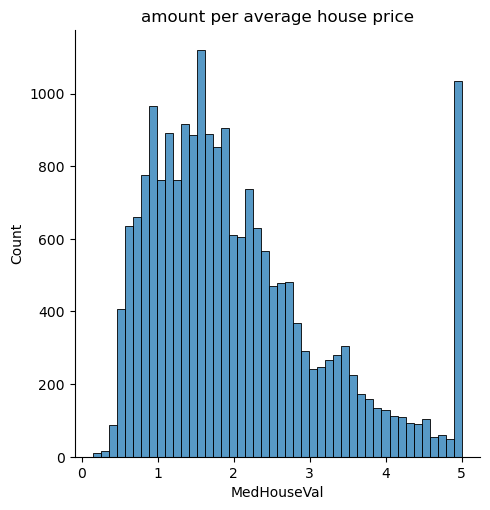

In [11]:
fig=sns.displot(y,palette='pastel') 
plt.title('amount per average house price')  
plt.savefig('./images/distribution-calhousing.png')
plt.show() 

### showing heat map of correlation matrix 

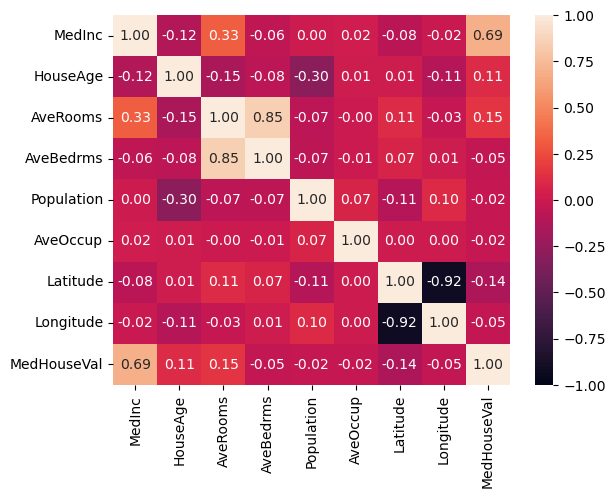

In [12]:
sns.heatmap(data=df.corr(),annot=True, fmt=".2f",mask=None,vmin=-1.0, vmax=1.0)  
plt.savefig('./images/correlation-heat-map.png')
plt.show()

### showing average house price per region

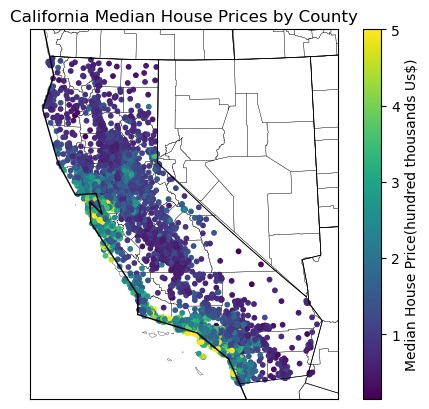

In [13]:
m = Basemap(
    projection='lcc',
    resolution='c',
    lat_0=37.5, lon_0=-119,
    width=1E6, height=1.2E6
)

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawcounties(linewidth=0.2) 

m.scatter(df['Longitude'], df['Latitude'], latlon=True, c=df['MedHouseVal'], cmap='viridis', marker='o', s=10)

plt.colorbar(label='Median House Price(hundred thousands Us$)')

plt.title('California Median House Prices by County')
plt.savefig('./images/medianhouseval-geomap.png')
plt.show()

### dividing prices into periodos

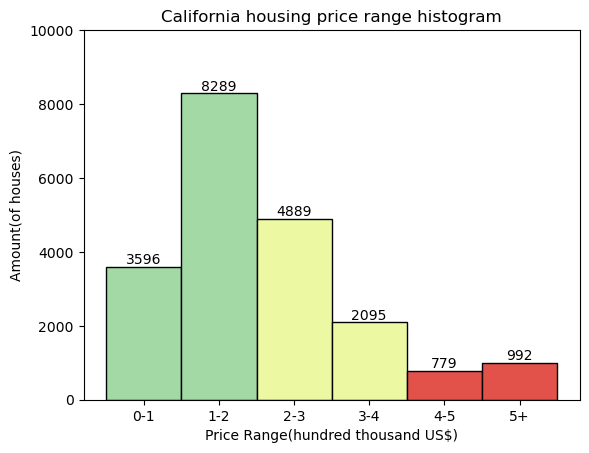

In [14]:
df_periodo=df.copy()
conditions = [
    (df_periodo['MedHouseVal'] >= 0.0) & (df_periodo['MedHouseVal'] < 1.0),
    (df_periodo['MedHouseVal'] >= 1.0) & (df_periodo['MedHouseVal'] < 2.0),
    (df_periodo['MedHouseVal'] >= 2.0) & (df_periodo['MedHouseVal'] < 3.0),
    (df_periodo['MedHouseVal'] >= 3.0) & (df_periodo['MedHouseVal'] < 4.0), 
    (df_periodo['MedHouseVal'] >= 4.0) & (df_periodo['MedHouseVal'] < 5.0), 
    (df_periodo['MedHouseVal'] >= 5.0)
]  
choices = ['0-1', '1-2', '2-3', '3-4','4-5','5+'] 
df_periodo['price_range']=np.select(conditions, choices, default='Error')  
df_periodo['price_range']=pd.Categorical(df_periodo['price_range'], categories=['0-1', '1-2', '2-3', '3-4','4-5','5+'], ordered=True)
cm=sns.color_palette('Spectral')
hist=sns.histplot(data=df_periodo,bins=6,x='price_range')  
hist.set_xlabel('Price Range(hundred thousand US$)') 
hist.set_ylabel('Amount(of houses)')  
plt.title('California housing price range histogram')
bin_order=['0-1', '1-2', '2-3', '3-4','4-5','5+'] 
hist.set_ylim(0,10000)
patches=hist.patches  
for k in range(0,2):
    patches[k].set_facecolor(cm[4]) 
for k in range(2,4): 
    patches[k].set_facecolor(cm[3])
for k in range(4,len(patches)):  
    patches[k].set_facecolor(cm[0]) 
for p in hist.patches:
    height = p.get_height()
    if height > 0:  
        hist.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom')
plt.savefig('./images/California housing price range histogram.png')   
plt.show()  


### reducing dimensions to see scatterplot with tsne

In [15]:
from sklearn.manifold import TSNE
df_tsne_sample=df.sample(frac=0.2) 
X_tsne_sample=df_tsne_sample.drop(columns=['MedHouseVal']) 
y_tsne_sample=df_tsne_sample['MedHouseVal']
tsne=TSNE(n_components=1,random_state=200)  #we apply the random state so that its not different everytime we restar 
array_red=tsne.fit_transform(X_tsne_sample) #applying dimensional reductioon on array  
df_tsne=pd.DataFrame(array_red,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_tsne = df_tsne.reset_index(drop=True)
y_tsne_sample = y_tsne_sample.reset_index(drop=True)
df_tsne

,COMP1
0,-56.517746
1,-25.183281
2,-111.684067
3,129.375717
4,-32.260746
...,...
4123,-23.997780
4124,40.463226
4125,4.494049
4126,94.671677


In [16]:
df_tsne['target']=y_tsne_sample
df_tsne

,COMP1,target
0,-56.517746,2.458
1,-25.183281,3.547
2,-111.684067,2.583
3,129.375717,1.687
4,-32.260746,2.427
...,...,...
4123,-23.997780,4.333
4124,40.463226,0.818
4125,4.494049,3.500
4126,94.671677,2.598


In [17]:
array_red

array([[ -56.517746],
       [ -25.18328 ],
       [-111.68407 ],
       ...,
       [   4.494049],
       [  94.67168 ],
       [ -58.629856]], dtype=float32)

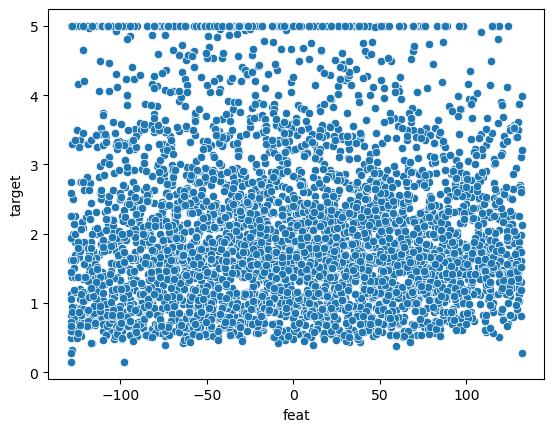

In [18]:
sns.scatterplot(data=df_tsne,x='COMP1',y='target') 
plt.xlabel("feat") 
plt.ylabel("target") 
plt.savefig('./images/dimension-reduction-tsne.png')
plt.show() 

### using dimensiality reduction with PCA

In [19]:
from sklearn.decomposition import PCA   
df_pca_sample=df.sample(frac=0.2) 
X_pca_sample=df_pca_sample.drop(columns=['MedHouseVal']) 
y_pca_sample=df_pca_sample['MedHouseVal']
pca=PCA(n_components=1) 
arrayFeat=pca.fit_transform(X_pca_sample) 
df_pca=pd.DataFrame(arrayFeat,columns=['COMP1']) # making it into a pandas dataframe for easier viewing 
df_pca = df_pca.reset_index(drop=True)
y_pca_sample = y_pca_sample.reset_index(drop=True)
df_pca 

,COMP1
0,283.079858
1,-1386.908197
2,-468.850899
3,50.049547
4,-163.904562
...,...
4123,272.111883
4124,-427.887468
4125,-279.999137
4126,1054.100650


In [20]:
df_pca['target']=y_pca_sample 
df_pca

,COMP1,target
0,283.079858,2.750
1,-1386.908197,0.575
2,-468.850899,2.491
3,50.049547,0.712
4,-163.904562,2.188
...,...,...
4123,272.111883,1.283
4124,-427.887468,2.893
4125,-279.999137,2.750
4126,1054.100650,2.715


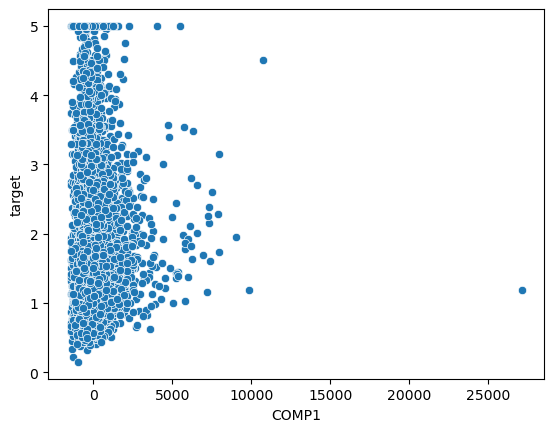

In [21]:
sns.scatterplot(data=df_pca,x='COMP1',y='target')
plt.savefig('./images/dimension-reduction-pca.png')
plt.show()

## SPLITTING DATA

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [23]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17541,3.2793,37.0,4.526012,1.083815,1223.0,3.534682,37.35,-121.87
11704,10.2252,14.0,7.100000,1.046154,420.0,3.230769,33.89,-117.97
4038,5.4609,23.0,6.165837,1.102819,4076.0,2.253179,34.16,-118.51
19005,4.8750,25.0,5.781250,1.000000,85.0,2.656250,38.31,-121.93
146,6.5217,52.0,6.399351,1.087662,765.0,2.483766,37.81,-122.22
...,...,...,...,...,...,...,...,...
4006,6.0192,33.0,7.046229,1.107056,1116.0,2.715328,34.16,-118.63
12777,1.8611,42.0,4.751381,1.055249,1069.0,2.953039,38.64,-121.42
5083,1.3479,42.0,3.907586,1.059310,2542.0,3.506207,33.98,-118.29
20278,5.0016,19.0,5.531432,1.029686,6370.0,3.707800,34.19,-119.20


In [24]:
y_train

17541    1.74500
11704    4.62800
4038     5.00001
19005    2.50000
146      2.73700
          ...   
4006     3.47700
12777    0.60500
5083     1.00000
20278    2.18500
6330     2.84000
Name: MedHouseVal, Length: 16512, dtype: float64

In [25]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18738,1.9881,12.0,4.513889,0.998843,2145.0,2.482639,40.56,-122.35
9717,2.7321,28.0,5.043269,1.129808,705.0,3.389423,36.85,-121.79
19059,3.5647,33.0,5.423358,1.058394,781.0,2.850365,38.22,-122.49
6309,3.1850,30.0,4.763326,1.022388,4027.0,4.293177,34.04,-117.99
8028,4.1094,37.0,5.830986,1.037559,565.0,2.652582,33.84,-118.12
...,...,...,...,...,...,...,...,...
17119,4.0039,36.0,5.062762,0.987448,981.0,4.104603,37.48,-122.14
10156,5.0258,12.0,5.882911,1.243671,622.0,1.968354,33.89,-117.92
20508,1.2542,42.0,3.253571,1.135714,1372.0,2.450000,38.58,-121.51
13267,2.7266,17.0,4.038391,1.148080,2417.0,2.209324,34.09,-117.67


In [26]:
y_test

18738    0.852
9717     1.500
19059    2.518
6309     1.683
8028     2.158
         ...  
17119    1.489
10156    1.618
20508    0.760
13267    1.010
19418    2.200
Name: MedHouseVal, Length: 4128, dtype: float64

## CREATING MODEL 

In [27]:
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor


In [28]:
# model=DecisionTreeRegressor() 

In [29]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split 
from sklearn.datasets import load_diabetes 
from sklearn.decomposition import PCA  
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import RadiusNeighborsRegressor 
from sklearn.cross_decomposition import PLSCanonical,PLSRegression
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor  
from xgboost import XGBRegressor
def getModels(): 
   return {"LINEAR REGRESSION":LinearRegression(), 
    "RANDOM FOREST":RandomForestRegressor(max_depth=9,min_samples_leaf=4,min_samples_split=8,n_estimators=200),
    "ADA BOOST":AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50), 
    "DECISION TREE":DecisionTreeRegressor(), 
    "SGD":make_pipeline(StandardScaler(),SGDRegressor(alpha= 0.01,eta0= 0.1,learning_rate= 'optimal',loss= 'epsilon_insensitive',max_iter= 100,penalty= 'l1',tol= 0.01)), 
    "KNN":KNeighborsRegressor(algorithm= 'ball_tree', leaf_size= 30, n_neighbors= 10, p= 1, weights= 'distance'),
    "EXTRA TREES":ExtraTreesRegressor(random_state=0,max_depth=6),
    "GRADIENT BOOST":GradientBoostingRegressor(random_state=0) , 
    "XGREGRESSOR":XGBRegressor(colsample_bytree= 0.8,gamma= 0,learning_rate= 0.1,max_depth= 7,n_estimators= 200,reg_alpha= 1,reg_lambda= 10,subsample= 1.0)}

## TRAINING MODEL

In [30]:
# model.fit(X_train,y_train)

In [31]:
models=getModels() 
for i in models.keys(): 
    models[i].fit(X_train,y_train)

""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

print('models loaded') 
models

models loaded


{'LINEAR REGRESSION': LinearRegression(),
 'RANDOM FOREST': RandomForestRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200),
 'ADA BOOST': AdaBoostRegressor(learning_rate=0.1, loss='exponential'),
 'DECISION TREE': DecisionTreeRegressor(),
 'SGD': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('sgdregressor',
                  SGDRegressor(alpha=0.01, eta0=0.1, learning_rate='optimal',
                               loss='epsilon_insensitive', max_iter=100,
                               penalty='l1', tol=0.01))]),
 'KNN': KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, p=1,
                     weights='distance'),
 'EXTRA TREES': ExtraTreesRegressor(max_depth=6, random_state=0),
 'GRADIENT BOOST': GradientBoostingRegressor(random_state=0),
 'XGREGRESSOR': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsampl

## PREDICTING

In [32]:
scores={} 
predictions={} 
rmse={}  
mse={} 
metrics={}
from sklearn.metrics import mean_squared_error 
for i in models.keys():  
    predictions[i]=models[i].predict(X_test) 
    rmse[i]=mean_squared_error(y_test,predictions[i],squared=True)  
    mse[i]=mean_squared_error(y_test,predictions[i],squared=False) 
    metrics[i]={'MSE':mse[i],'RMSE':rmse[i]}
    scores[i]=rmse[i]


""" scores =cross_val_score(getModel(),X,y,cv=10) 
print("R2: ",np.absolute(np.mean(scores))) """ 

with open('./results/results.txt', 'w') as file:
    # Iterate over dictionary items and write them to the file
    for key, value in metrics.items():
        file.write(f'{key}: {value}\n')
metrics 

{'LINEAR REGRESSION': {'MSE': 0.707369838804986, 'RMSE': 0.5003720888509919},
 'RANDOM FOREST': {'MSE': 0.5415613927276133, 'RMSE': 0.2932887420930722},
 'ADA BOOST': {'MSE': 0.7340363493909705, 'RMSE': 0.538809362227223},
 'DECISION TREE': {'MSE': 0.700474044217595, 'RMSE': 0.4906638866225532},
 'SGD': {'MSE': 0.9851667695829837, 'RMSE': 0.9705535638905716},
 'KNN': {'MSE': 0.9928303332918973, 'RMSE': 0.9857120707044998},
 'EXTRA TREES': {'MSE': 0.7384480705832662, 'RMSE': 0.5453055529481485},
 'GRADIENT BOOST': {'MSE': 0.511143978093928, 'RMSE': 0.26126816634168587},
 'XGREGRESSOR': {'MSE': 0.4320301801308536, 'RMSE': 0.1866500765438978}}

### getting best parameter for models

#### RANDOM FOREST

In [33]:
# uncomment if you want to find the best parameters for random forest(takes a long long time)
# param_grid = {
#     'n_estimators': [50, 100,200],
#     'max_depth': [5,6,8,9],
#     'min_samples_split': [4,5,8,10],s
#     'min_samples_leaf': [2, 4,6]
# }
# rf = RandomForestRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('grid_search_results.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### ADABOOST

In [34]:
# uncomment if you wanna know the best params for adaboost
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0],  
#     'loss':['linear', 'square', 'exponential']
# }
# adaboost = AdaBoostRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('./parameters/adaboost-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### KNN 

In [35]:
# uncomment if you wanna know the best params for knn
# param_grid = {
#     'n_neighbors': [3, 5, 7, 10],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2], 
#     'algorithm':['ball_tree', 'kd_tree', 'brute'], 
#     'leaf_size':[30,15,7,40,60,5]
# }
# knn = KNeighborsRegressor()

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started ving models')
# with open('./parameters/knn-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### SGD

In [36]:
# uncomment if you wanna know the best params for sgd
# param_grid = {
#     'sgdregressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
#     'sgdregressor__penalty': ['l1', 'l2', 'elasticnet'],
#     'sgdregressor__alpha': [0.0001, 0.001, 0.01],
#     'sgdregressor__learning_rate': ['constant', 'optimal', 'invscaling'],
#     'sgdregressor__eta0': [0.01, 0.1, 0.5],
#     'sgdregressor__tol': [1e-4, 1e-3, 1e-2],
#     'sgdregressor__max_iter': [100, 500, 1000]  
# }
# pipe = make_pipeline(StandardScaler(), SGDRegressor())

# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started saving models')
# with open('./parameters/svg-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

#### XGBOOSTER

In [37]:
# uncomment if you wanna know the best params for xgbooster(takes a REALLY long time)
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 1, 5],
#     'reg_alpha': [0, 1, 10],
#     'reg_lambda': [0, 1, 10]
# }
# xgb_reg = XGBRegressor()
# # Create GridSearchCV 
# print('started grid search')
# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# print('finish grid search')
# # Fit the model to the data 
# print('started fitting data')
# grid_search.fit(X_train, y_train)
# print('finished fitting data')
# # Get the best parameters 
# print('started printing params')
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Make predictions using the best model 
# print('started predicitons')
# y_pred = grid_search.predict(X_test)

# # Evaluate the model 
# print('started evaluating model')
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error on Test Set:", mse)  
# print('started saving models')
# with open('./parameters/xgbooster-parameters.txt', 'w') as f:
#     f.write(f'Best Parameters: {best_params}\n')
#     f.write(f'Mean Squared Error on Test Set: {mse}\n')

### comparing each model

In [38]:
# plt.scatter(y_test, y_pred,edgecolor='black')
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.title("True Values vs Predictions in Regression")
# plt.show()

['LINEAR REGRESSION', 'RANDOM FOREST', 'ADA BOOST', 'DECISION TREE', 'SGD', 'KNN', 'EXTRA TREES', 'GRADIENT BOOST', 'XGREGRESSOR']
9


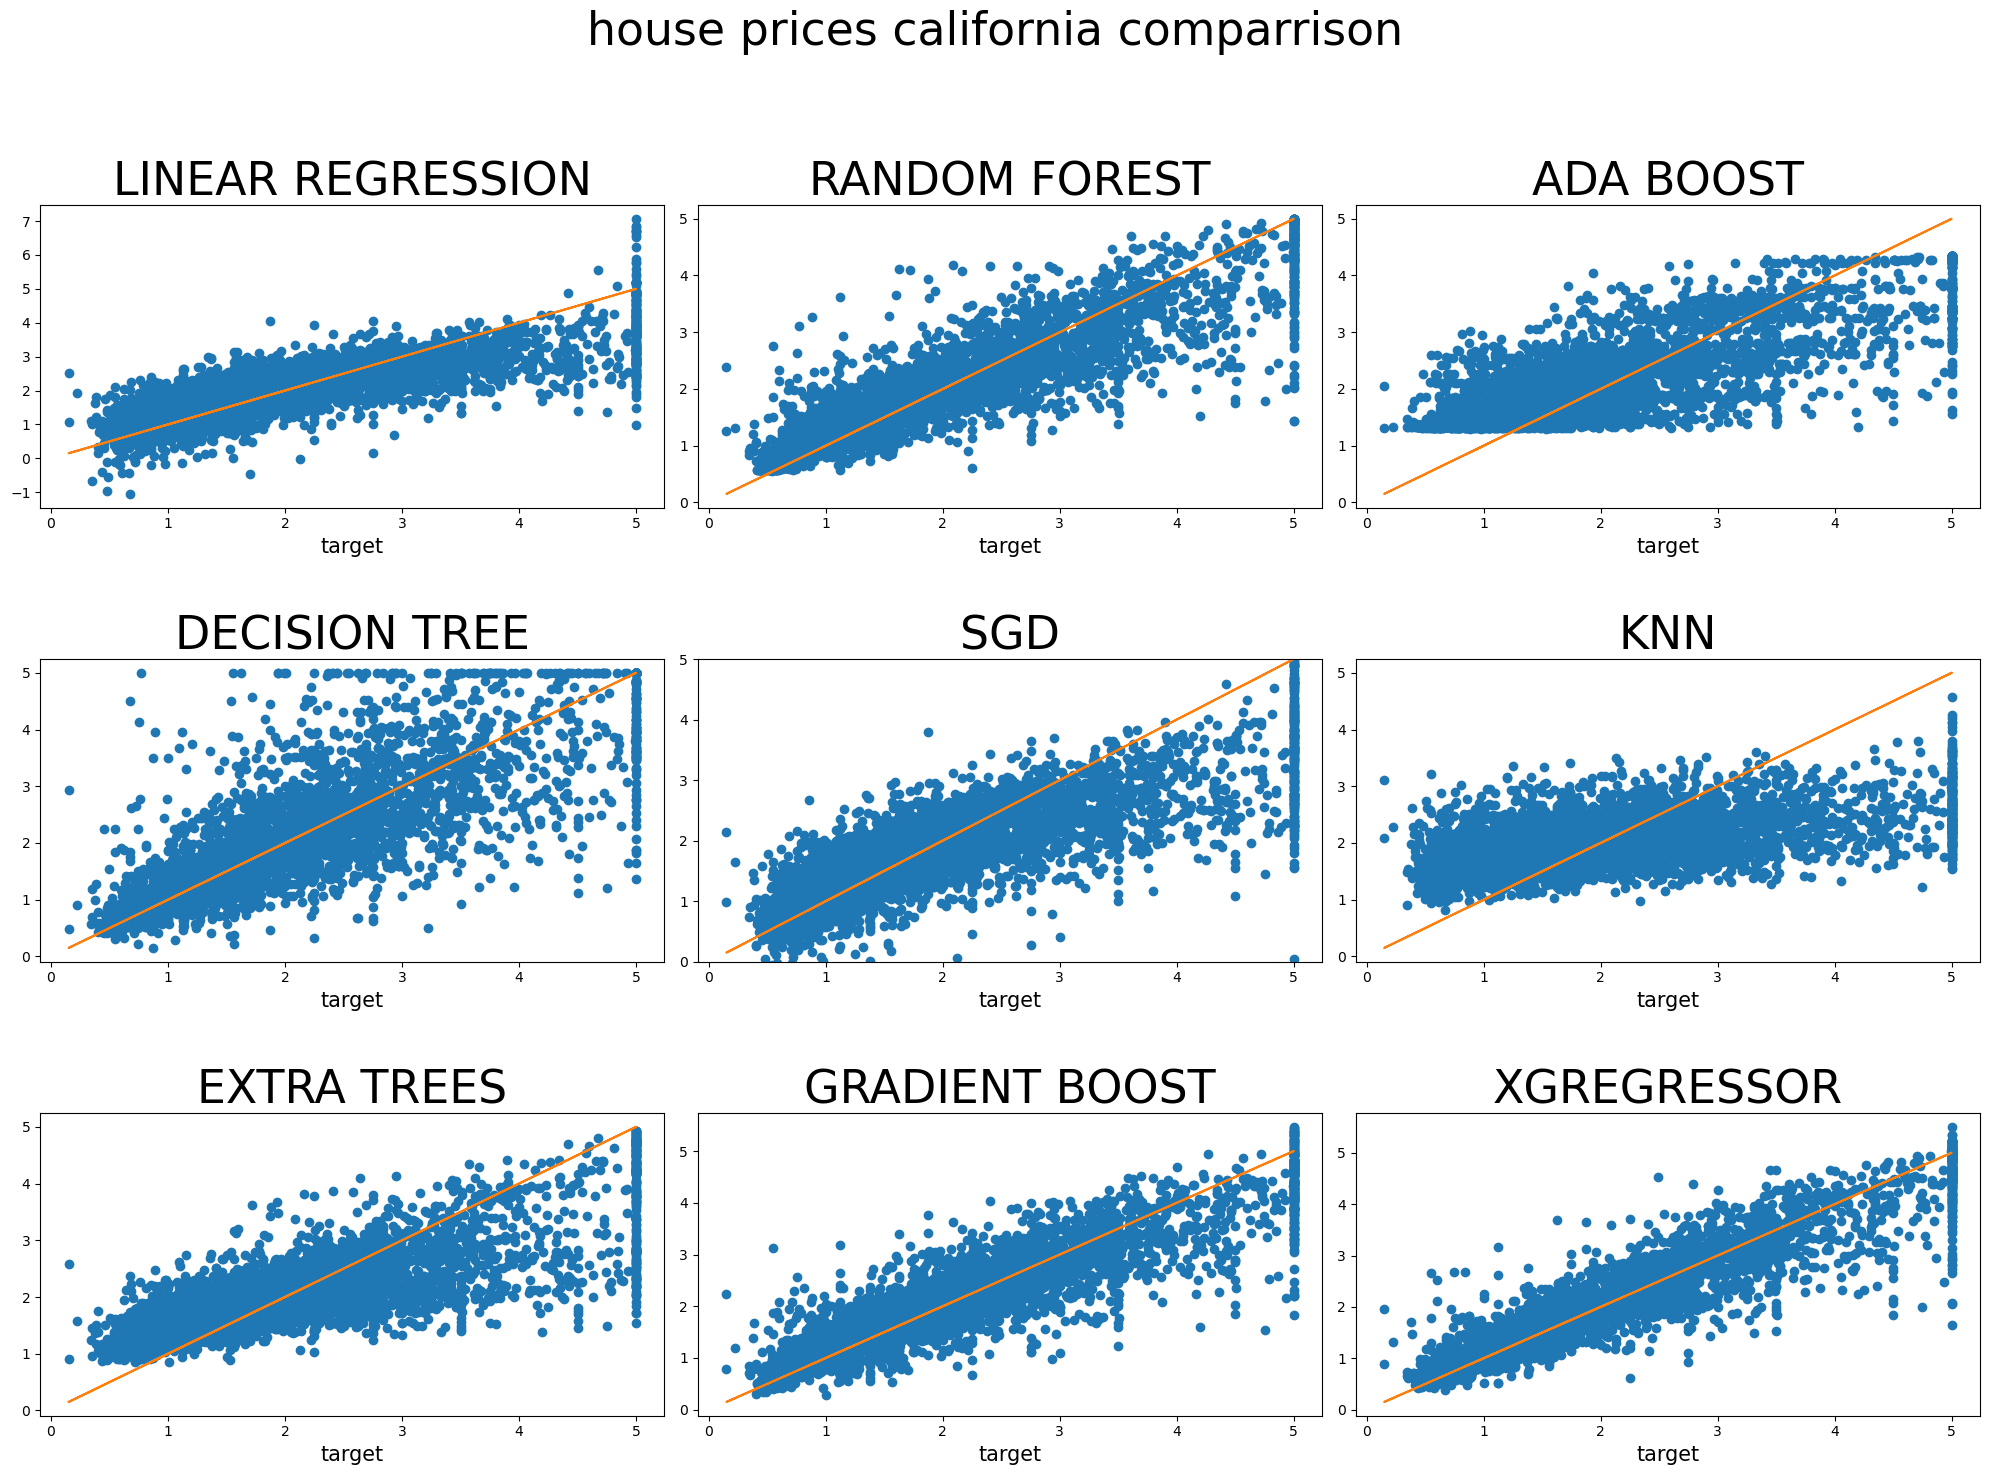

In [39]:
auxdic=scores
auxdic=list(auxdic.items())

fig,ax =plt.subplots(3,3) 
fig.suptitle("house prices california comparrison",size=33)   
fig.set_figwidth(20)
fig.set_figheight(15)
dimX=ax.shape[0] 
dimY=ax.shape[1] 
predictionsList= []
for i in predictions.keys():
    predictionsList.append(predictions[i]) 
predictionsList=np.transpose(predictionsList) 
predictionsList=pd.DataFrame(predictionsList,columns=models.keys())  

#print(predictions)
#predictions=np.transpose(pd.DataFrame(predictions)) 
m_keys=list(models.keys()) 
print(m_keys) 
print(len(m_keys))
for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j  
        ax[i,j].plot(y_test,predictions[m_keys[oneDIndex]],"o")  
        ax[i,j].set_title(m_keys[oneDIndex],size=33) 
        ax[i,j].set_xlabel("target",size=15) 
        ax[i,j].set_xbound(lower=0,upper=10)
        if m_keys[oneDIndex] == 'SGD': 
            ax[i,j].set_ybound(lower=0,upper=12) 
            ax[i,j].set_ylim(0,5) 
        m,b=np.polyfit(y_test,y_test,deg=1)
        ax[i,j].plot(y_test,m*y_test+b)
        # centerish=ax[i,j].get_xbound()[1]/2
        # centerishY=ax[i,j].get_ybound()[1]/2
        # ax[i,j].text(x=centerish-13,y=-centerishY/2.5,s=("R2:%f" % float(auxdic[oneDIndex][1])),ma="center")
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5) 
plt.savefig('./images/model-comparrison.png')

### getting residuals

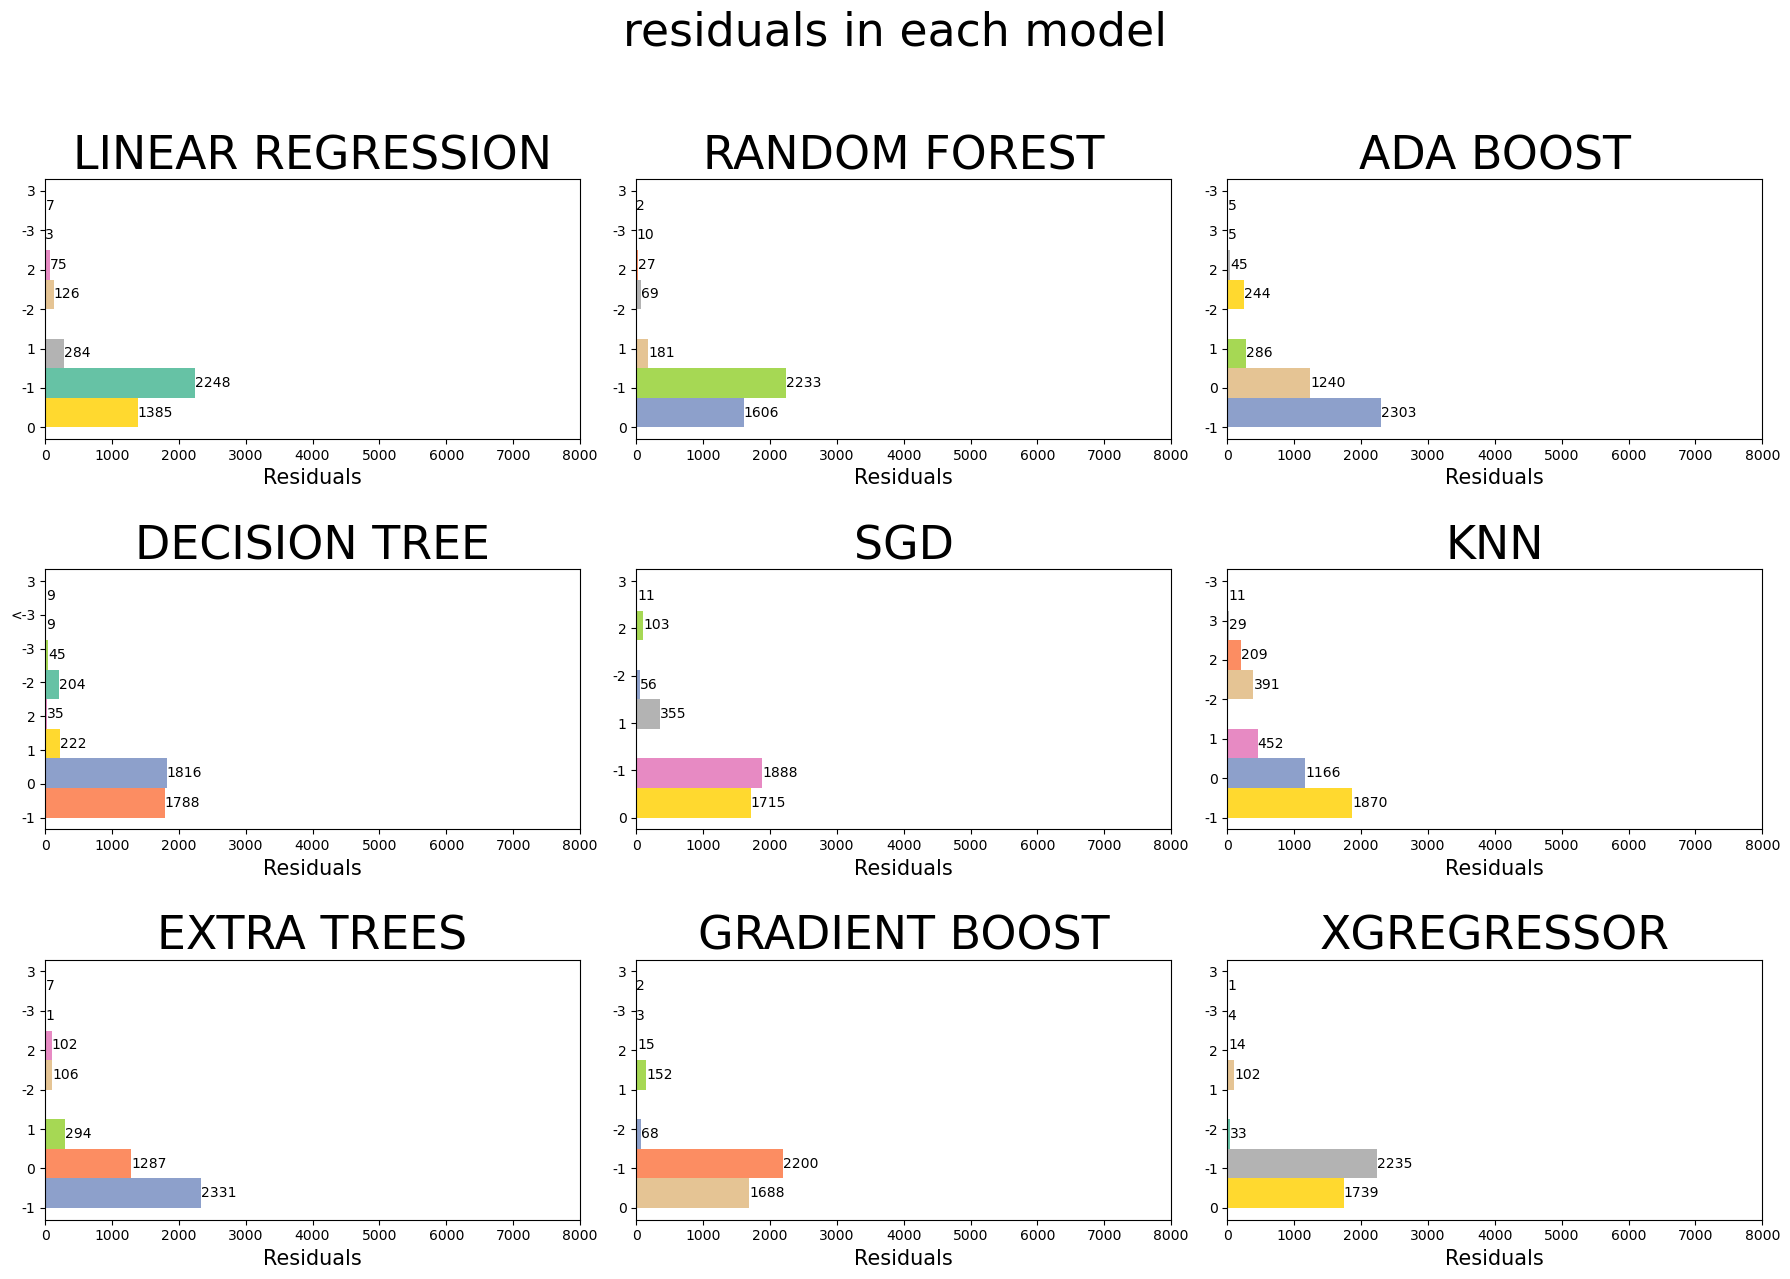

In [43]:
import random as rd
# residuals = y_test - y_pred
# plt.hist(residuals, bins=50)
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.title("Distribution of Residuals in Regression")
# plt.show() 

auxdic=scores
auxdic=list(auxdic.items())
df_residuals=df.copy()
fig,ax =plt.subplots(3,3) 
fig.suptitle("residuals in each model",size=33)   
fig.set_figwidth(18)
fig.set_figheight(13)
dimX=ax.shape[0] 
dimY=ax.shape[1] 
predictionsList= []
residuals_list=[] 
for i in predictions.keys():
    predictionsList.append(predictions[i])  
    residuals_list.append(y_test - predictions[i])
predictionsList=np.transpose(predictionsList) 
predictionsList=pd.DataFrame(predictionsList,columns=models.keys())  
residuals_list= np.transpose(residuals_list) 
df_residuals=pd.DataFrame(data=residuals_list, columns=predictions.keys()) 
for pKey in predictions.keys():     
    s_conditions = [ 
        (df_residuals[pKey] < -3),
        (df_residuals[pKey] >= -3) & (df_residuals[pKey] < -2),
        (df_residuals[pKey] >= -2) & (df_residuals[pKey] < -1),
        (df_residuals[pKey] >= -1) & (df_residuals[pKey] < 0),
        (df_residuals[pKey] >= 0) & (df_residuals[pKey] < 1), 
        (df_residuals[pKey] >= 1) & (df_residuals[pKey] < 2), 
        (df_residuals[pKey] >= 2) & (df_residuals[pKey] < 3), 
        (df_residuals[pKey] >= 3) 
    ] 
    s_choices=  [
                    '<-3',
                    '-3',
                    '-2',
                    '-1',
                    '0',
                    '1',
                    '2',
                    '3' 
                ]
    df_residuals[pKey + '_RANGE']=np.select(s_conditions, s_choices, default='Error')  
    df_residuals[pKey + '_RANGE']=pd.Categorical(df_residuals[pKey + '_RANGE'], categories=s_choices[::1], ordered=True,)    
m_keys=list(models.keys())   
axel=np.zeros(len(m_keys))
cm = sns.color_palette('Set2', n_colors=8)
for i in range(dimX): 
    for j in range(dimY) : 
        oneDIndex=(i*dimX)+j   
        patches=[]
        #ax[i,j].plot(y_test,predictions[m_keys[oneDIndex]],"o")  
        residuals = y_test - predictions[m_keys[oneDIndex]]  
        # new_df=[]
        # new_df=pd.DataFrame(df_residuals[m_keys[oneDIndex] +'_RANGE'].value_counts())   
        N, bins, patches=ax[i,j].hist(x=df_residuals[m_keys[oneDIndex] +'_RANGE'],bins=8,orientation='horizontal')  
        used=[]
        for k in range(0,len(patches)): 
            index = rd.randint(0,len(patches)-1)   
            height = patches[k].get_width()
            while index == -1  or index in used: 
                index = rd.randint(0,len(patches)-1) 
            used.append(index)  
            patches[k].set_facecolor(cm[index]) 
        for k, rect in enumerate(patches):
            height = rect.get_width()
            if height > 0:
                ax[i, j].text(height, rect.get_y() + rect.get_height() / 2., f'{int(height)}', va='center')
        ax[i,j].set_title(m_keys[oneDIndex],size=33) 
        # ax[i,j].set_ylim(0, )
        ax[i,j].set_xlabel("Residuals",size=15)  
        max_residual = max(abs(residuals))
        ax[i, j].set_xlim(0, 8000)
        # ax[i,j].set_xbound(lower=0,upper=10)
        # centerish=ax[i,j].get_xbound()[1]/2
        # centerishY=ax[i,j].get_ybound()[1]/2
        # ax[i,j].text(x=centerish-13,y=-centerishY/2.5,s=("R2:%f" % float(auxdic[oneDIndex][1])),ma="center") 
        
fig.align_labels() 
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.5) 
plt.savefig('./images/residuals-by-model.png')   
plt.show()

In [40]:
new_df

NameError: name 'new_df' is not defined

In [ ]:
df_residuals 
# ax =sns.histplot(data=df_residuals,x='DECISION TREE_RANGE') 
#arnaldo=sns.barplot(data=df_residuals['LINEAR REGRESSION_RANGE'].value_counts(),orient='h') 
new_df=pd.DataFrame(df_residuals['LINEAR REGRESSION_RANGE'].value_counts())  
new_df

,count
LINEAR REGRESSION_RANGE,
>= -1 x < 0,2315
>= 0 x < 1,1345
>= 1 x < 2,242
>= -2 x < -1,131
>= 2 x < 3,78
>= 3,9
>= -3 x < -2,6
< -3,2


In [ ]:
df_residuals['DECISION TREE_RANGE'].value_counts()

DECISION TREE_RANGE
>= 0 x < 1       1868
>= -1 x < 0      1760
>= -2 x < -1      216
>= 1 x < 2        181
>= -3 x < -2       44
>= 2 x < 3         34
< -3               13
>= 3               12
Name: count, dtype: int64

### true values vs predicitons

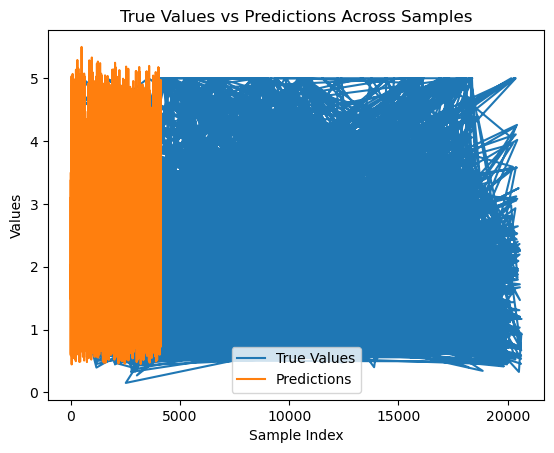

In [ ]:
plt.plot(y_test, label='True Values')
plt.plot(predictions['XGREGRESSOR'], label='Predictions')
plt.xlabel("Sample Index")
plt.ylabel("Values")
plt.title("True Values vs Predictions Across Samples")
plt.legend()
plt.show()